In [ ]:
!pip install roboflow
!pip install torch torchvision torchaudio
!pip install opencv-python matplotlib numpy tqdm
!pip install pycocotools
!pip install roboflow torch torchvision opencv-python matplotlib scipy pillow pycocotools seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.4 MB/s eta 0:00:00
   

In [ ]:
!nvidia-smi

Mon Jul 28 14:39:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install -q rfdetr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 14.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 64.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.8/372.8 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 837.4/837.4 kB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.2 MB/s eta 0:00:00


rf-detr-base.pth: 100%|██████████| 355M/355M [00:17<00:00, 20.8MiB/s]


Loading pretrain weights


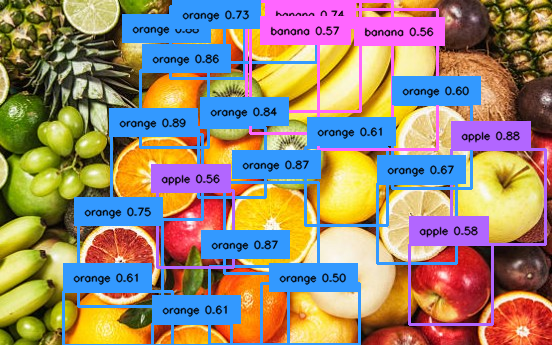

In [ ]:
from rfdetr import RFDETRBase
from rfdetr.util.coco_classes import COCO_CLASSES
import supervision as sv
import numpy as np
from PIL import Image

image = Image.open("demo.jpg")

model = RFDETRBase()
detections = model.predict(image, threshold=0.5)

color = sv.ColorPalette.from_hex([
    "#ffff00", "#ff9b00", "#ff8080", "#ff66b2", "#ff66ff", "#b266ff",
    "#9999ff", "#3399ff", "#66ffff", "#33ff99", "#66ff66", "#99ff00"
])
text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

bbox_annotator = sv.BoxAnnotator(color=color, thickness=thickness)
label_annotator = sv.LabelAnnotator(
    color=color,
    text_color=sv.Color.BLACK,
    text_scale=text_scale,
    smart_position=True
)

labels = [
    f"{COCO_CLASSES[class_id]} {confidence:.2f}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = bbox_annotator.annotate(annotated_image, detections)
annotated_image = label_annotator.annotate(annotated_image, detections, labels)
annotated_image

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
## !pip install roboflow ## If roboflow is not yet installed in your environment


from roboflow import Roboflow
rf = Roboflow(api_key="9AUJFzZQt4XtJjiLlGt0")
project = rf.workspace("testing-my-sa").project("fruit-detector2-qpud6")
version = project.version(1)
dataset = version.download("coco")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruit-detector2-1 in coco:: 100%|██████████| 508/508 [00:00<00:00, 2321.76it/s]


In [ ]:
from rfdetr import RFDETRBase

model = RFDETRBase(num_classes=14)

history = []

def callback2(data):
    history.append(data)

model.callbacks["on_fit_epoch_end"].append(callback2)

model.train(dataset_dir=dataset.location, epochs=5, batch_size=4, grad_accum_steps=1, lr=1e-4)

Loading pretrain weights


reinitializing detection head with 90 classes
reinitializing your detection head with 6 classes.


TensorBoard logging initialized. To monitor logs, use 'tensorboard --logdir output' and open http://localhost:6006/ in browser.
Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(num_classes=6, grad_accum_steps=1, amp=True, lr=0.0001, lr_encoder=0.00015, batch_size=4, weight_decay=0.0001, epochs=5, lr_drop=100, clip_max_norm=0.1, lr_vit_layer_decay=0.8, lr_component_decay=0.7, do_benchmark=False, dropout=0, drop_path=0.0, drop_mode='standard', drop_schedule='constant', cutoff_epoch=0, pretrained_encoder=None, pretrain_weights='rf-detr-base.pth', pretrain_exclude_keys=None, pretrain_keys_modify_to_load=None, pretrained_distiller=None, encoder='dinov2_windowed_small', vit_encoder_num_layers=12, window_block_indexes=None, position_embedding='sine', out_feature_indexes=[2, 5, 8, 11], freeze_encoder=False, layer_norm=True, rms_norm=False, backbone_lora=False, force_no_pretrain=False, dec_layers=3, dim_feedforward=2048, hidden_dim=256, sa_nheads=8, ca_nheads=16

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

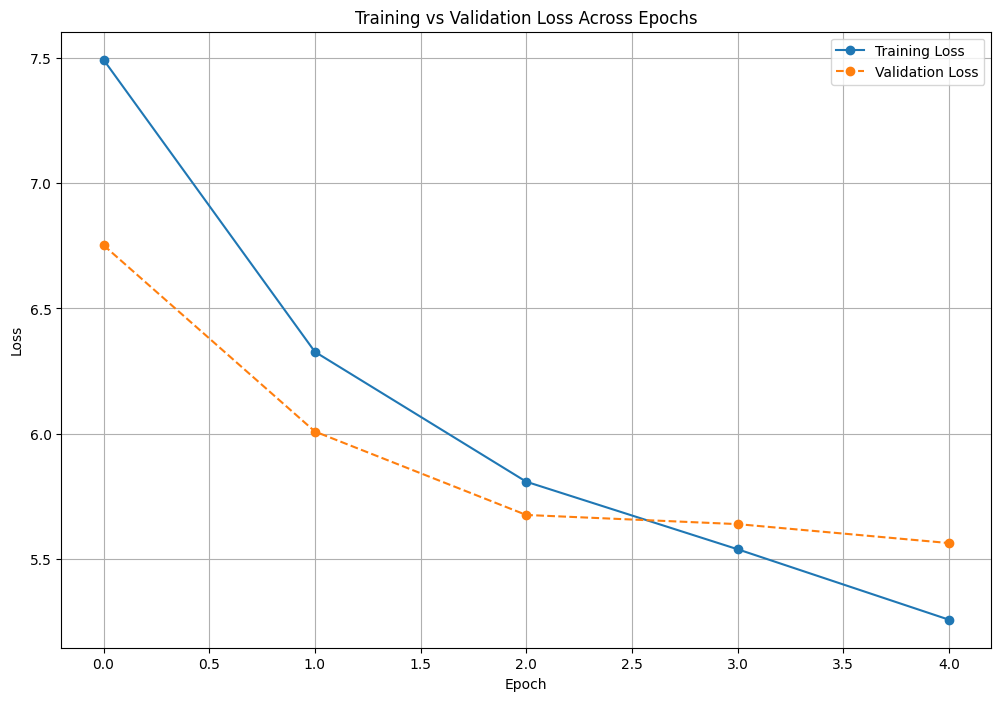

Average Training Loss: 6.0850
Average Validation Loss: 5.9281


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history list to DataFrame
loss_df = pd.DataFrame(history)

# Set up the plot figure
plt.figure(figsize=(12, 8))

# Plot training loss
plt.plot(
    loss_df['epoch'],
    loss_df['train_loss'],
    label='Training Loss',
    marker='o',
    linestyle='-'
)

# Plot validation loss
plt.plot(
    loss_df['epoch'],
    loss_df['test_loss'],
    label='Validation Loss',
    marker='o',
    linestyle='--'
)

# Add titles and labels
plt.title('Training vs Validation Loss Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Compute and print average losses
mean_train_loss = loss_df['train_loss'].mean()
mean_val_loss = loss_df['test_loss'].mean()

print(f"Average Training Loss: {mean_train_loss:.4f}")
print(f"Average Validation Loss: {mean_val_loss:.4f}")


In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_coco(
    images_directory_path=f"{dataset.location}/test",
    annotations_path=f"{dataset.location}/test/_annotations.coco.json",
)

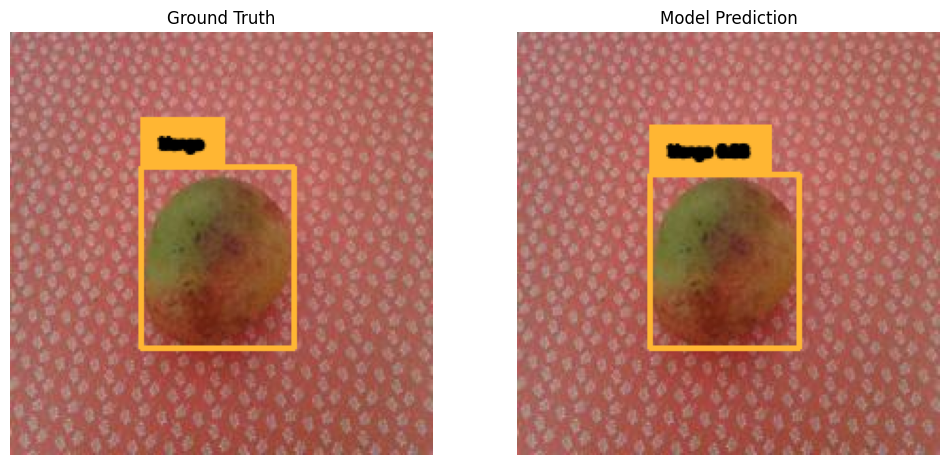

In [ ]:
from rfdetr import RFDETRBase
import supervision as sv
from PIL import Image
import random

# Select a random sample from the dataset
sample_index = random.randint(0, len(ds) - 1)
image_path, raw_image, ground_truth = ds[sample_index]
image = Image.open(image_path)

# Run prediction using the model
predicted_detections = model.predict(image, threshold=0.5)

# Calculate appropriate scaling for annotation visuals
font_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
line_thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

# Prepare annotators for bounding boxes and labels
box_drawer = sv.BoxAnnotator(thickness=line_thickness)
label_drawer = sv.LabelAnnotator(
    text_color=sv.Color.BLACK,
    text_scale=font_scale,
    text_thickness=line_thickness,
    smart_position=True
)

# Create labels for ground truth annotations
gt_labels = [f"{ds.classes[class_id]}" for class_id in ground_truth.class_id]

# Create labels for model predictions (class name + confidence)
pred_labels = [
    f"{ds.classes[class_id]} {score:.2f}"
    for class_id, score in zip(predicted_detections.class_id, predicted_detections.confidence)
]

# Visualize ground truth annotations
annotated_gt_image = image.copy()
annotated_gt_image = box_drawer.annotate(annotated_gt_image, ground_truth)
annotated_gt_image = label_drawer.annotate(annotated_gt_image, ground_truth, gt_labels)

# Visualize model predictions
annotated_pred_image = image.copy()
annotated_pred_image = box_drawer.annotate(annotated_pred_image, predicted_detections)
annotated_pred_image = label_drawer.annotate(annotated_pred_image, predicted_detections, pred_labels)

# Display both images side by side for comparison
sv.plot_images_grid(
    images=[annotated_gt_image, annotated_pred_image],
    grid_size=(1, 2),
    titles=["Ground Truth", "Model Prediction"]
)


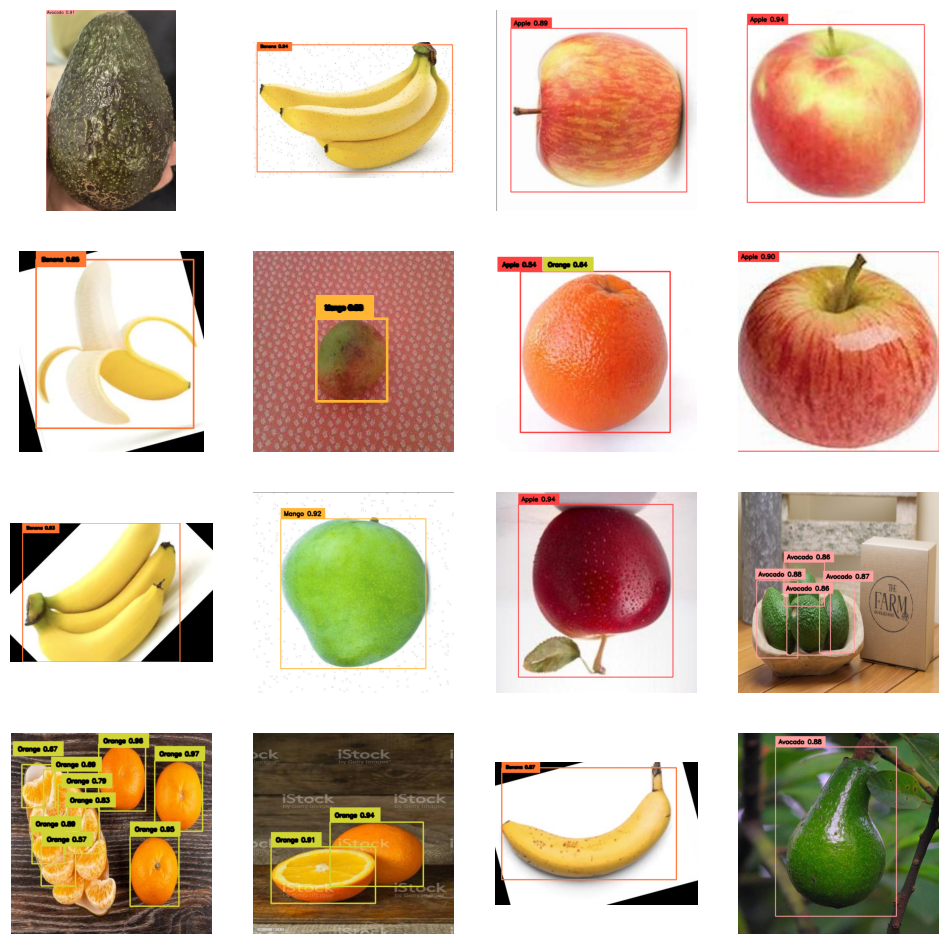

In [ ]:
import supervision as sv
from rfdetr import RFDETRBase
from PIL import Image

# List to store annotated detection images
visualized_detections = []

# Iterate over the first 16 samples in the dataset
for idx in range(16):
    img_path, raw_img, _ = ds[idx]
    image = Image.open(img_path)

    # Run detection on the image
    predictions = model.predict(image, threshold=0.5)

    # Calculate visual parameters for annotations
    text_scale = sv.calculate_optimal_text_scale(resolution_wh=image.size)
    line_thickness = sv.calculate_optimal_line_thickness(resolution_wh=image.size)

    # Set up annotation tools
    box_annotator = sv.BoxAnnotator(thickness=line_thickness)
    label_annotator = sv.LabelAnnotator(
        text_color=sv.Color.BLACK,
        text_scale=text_scale,
        text_thickness=line_thickness,
        smart_position=True
    )

    # Create labels with class names and confidence scores
    pred_labels = [
        f"{ds.classes[class_id]} {score:.2f}"
        for class_id, score in zip(predictions.class_id, predictions.confidence)
    ]

    # Draw annotations on a copy of the image
    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(annotated_image, predictions)
    annotated_image = label_annotator.annotate(annotated_image, predictions, pred_labels)

    # Store the annotated image
    visualized_detections.append(annotated_image)

# Display the annotated images in a 4x4 grid
sv.plot_images_grid(images=visualized_detections, grid_size=(4, 4))


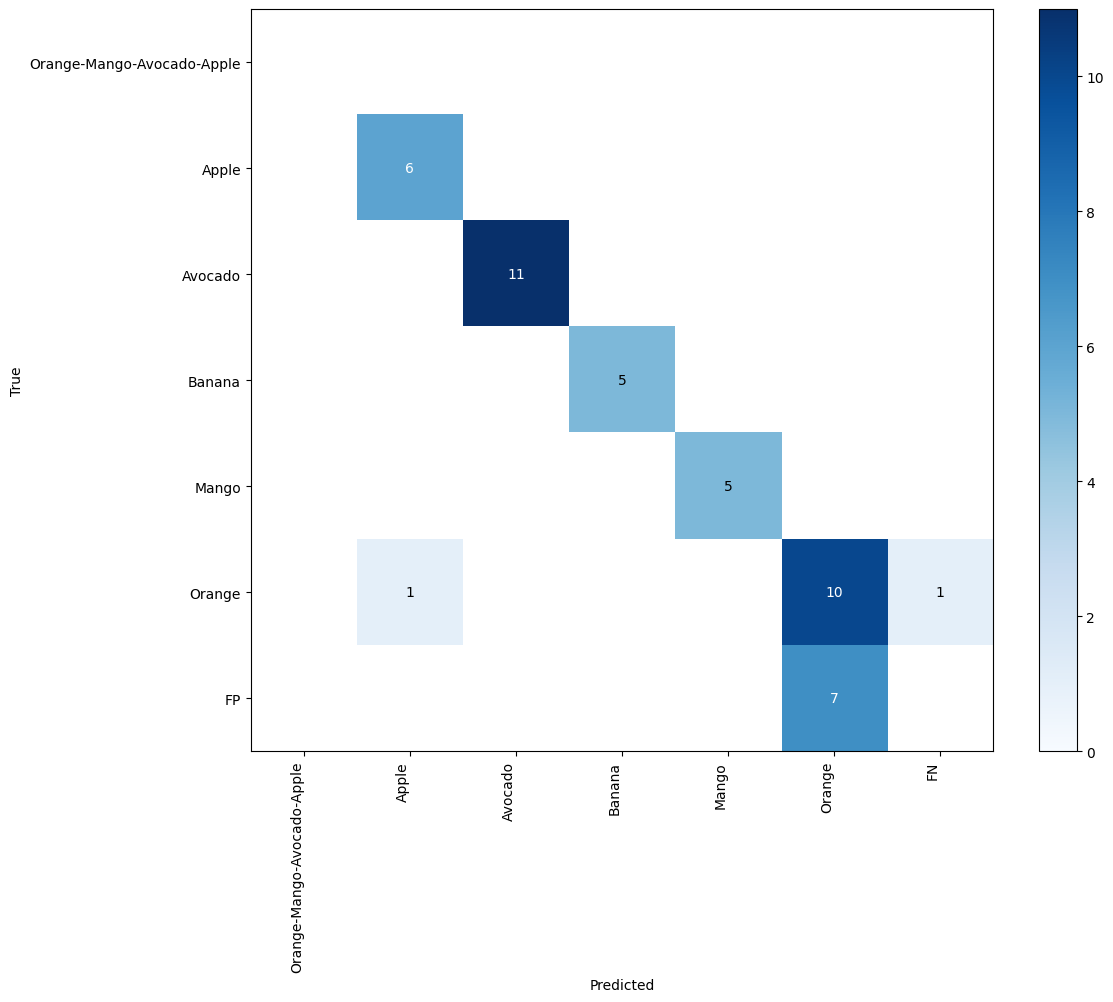

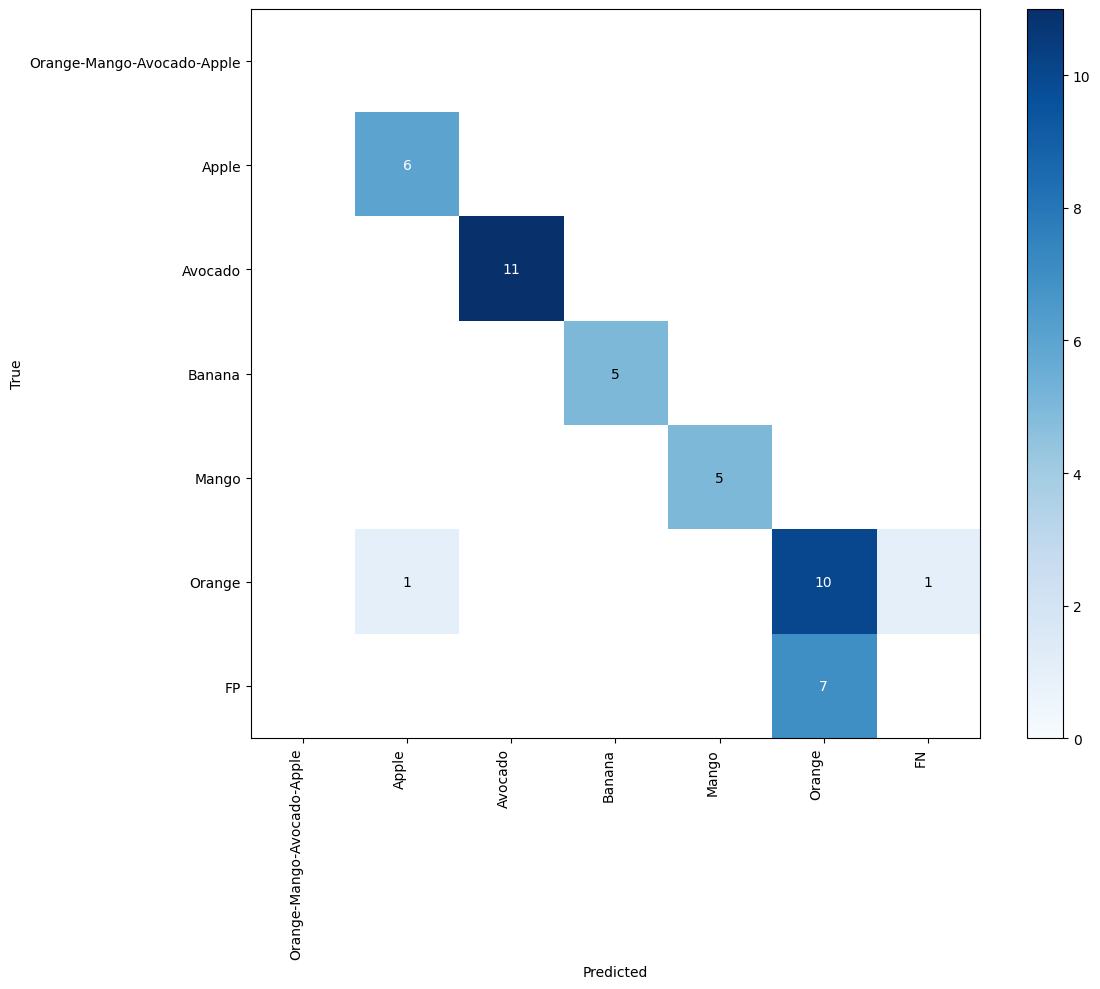

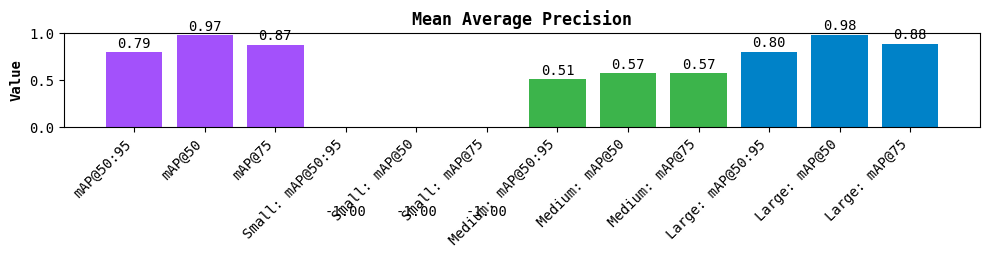


=== Per-Class Precision ===
Orange-Mango-Avocado-Apple: 0.0000
Apple: 0.8571
Avocado: 1.0000
Banana: 1.0000
Mango: 1.0000
Orange: 0.5882

=== Per-Class Recall ===
Orange-Mango-Avocado-Apple: 0.0000
Apple: 1.0000
Avocado: 1.0000
Banana: 1.0000
Mango: 1.0000
Orange: 0.8333

=== Overall Accuracy ===
Accuracy: 0.8043


In [ ]:
# Initialize the mAP evaluation metric
map_evaluator = MeanAveragePrecision()

# Update the evaluator with predictions and ground truths, then compute results
evaluation_result = map_evaluator.update(model_outputs, ground_truths).compute()

# Visualize mAP results
evaluation_result.plot()

# --- Confusion Matrix and Classification Metrics ---
conf_matrix = sv.ConfusionMatrix.from_detections(
    predictions=model_outputs,
    targets=ground_truths,
    classes=ds.classes
)

# Plot the confusion matrix
conf_matrix.plot()

# Get raw confusion matrix data
matrix = conf_matrix.matrix  # This is a 2D numpy array (shape: [num_classes, num_classes])
labels = ds.classes

# Compute metrics manually
true_positives = matrix.diagonal()
false_positives = matrix.sum(axis=0) - true_positives
false_negatives = matrix.sum(axis=1) - true_positives
total_samples = matrix.sum()

# Avoid division by zero
precision_per_class = true_positives / (true_positives + false_positives + 1e-8)
recall_per_class = true_positives / (true_positives + false_negatives + 1e-8)
overall_accuracy = true_positives.sum() / total_samples

# Display results
print("\n=== Per-Class Precision ===")
for label, precision in zip(labels, precision_per_class):
    print(f"{label}: {precision:.4f}")

print("\n=== Per-Class Recall ===")
for label, recall in zip(labels, recall_per_class):
    print(f"{label}: {recall:.4f}")

print(f"\n=== Overall Accuracy ===\nAccuracy: {overall_accuracy:.4f}")


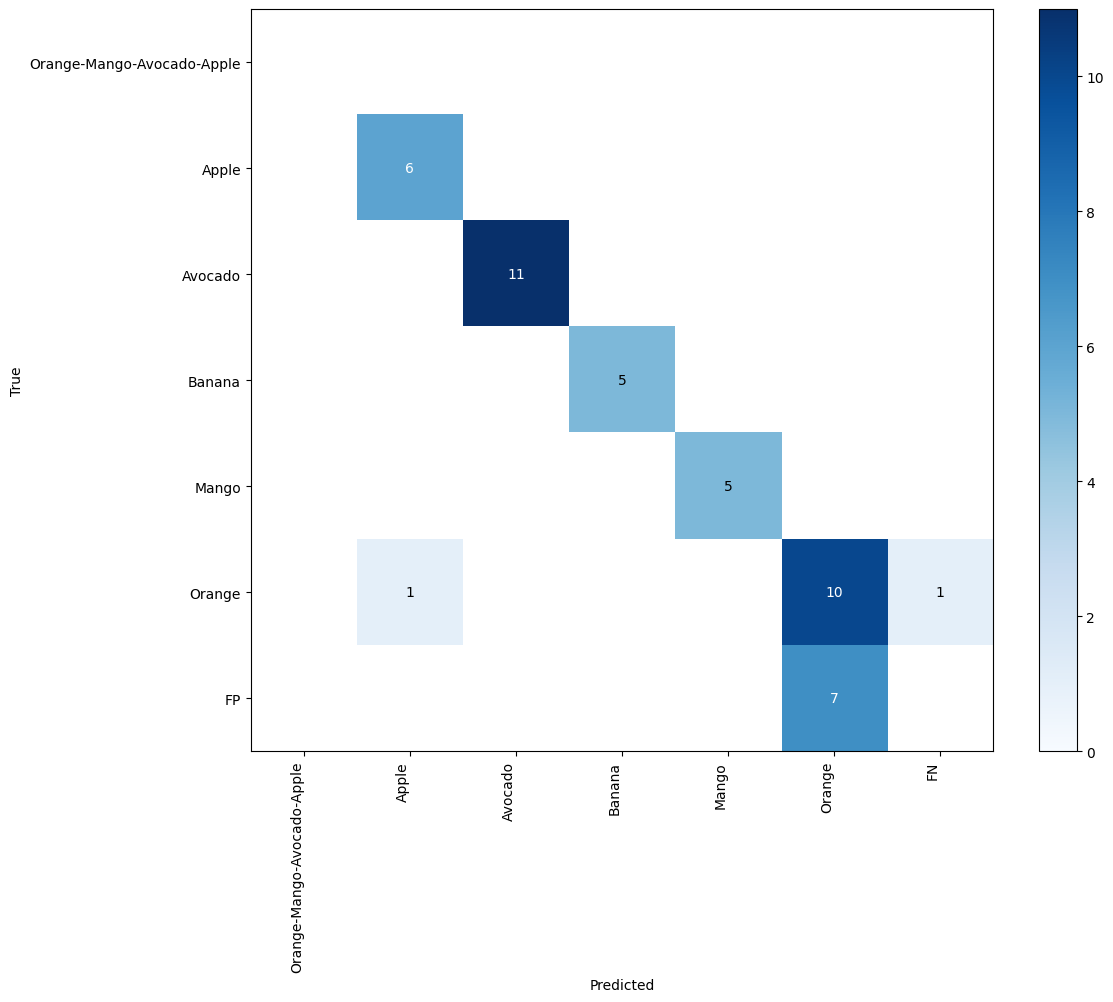

In [ ]:
# Generate a confusion matrix using model predictions and ground truth annotations
conf_matrix = sv.ConfusionMatrix.from_detections(
    predictions=model_outputs,
    targets=ground_truths,
    classes=ds.classes
)

# Visualize the resulting confusion matrix
conf_matrix.plot()
